Problem 2: Finding the Optimal k Using Leave-One-Out Cross Validation

In this task, you will use the K-Nearest Neighbors (KNN) classifier to classify handwritten digits from the
MNIST dataset. The goal is to determine:
1. The optimal number of neighbors (k) for the KNN classifier.
2. Evaluate the classifier's performance using leave-one-out cross-validation (LOO CV).

Steps to Follow:
1. Preprocess the MNIST dataset:
  - Normalize the pixel values (e.g., divide by 255 to scale between
0 and 1) and select a random 10% subset of the dataset.
2. KNN Classifier:
  - Use the KNeighborsClassifier from sklearn.neighbors. Iterate over different
values of k, specifically k = 1, 2, . . . , 10.
3. Leave-One-Out Cross-Validation:

  - For each value of k, perform LOO CV:
    - Train the KNN model on n - 1 data points, where n is the total number of samples.
    - Test the model on the single data point left out.
    - Repeat this for all data points and compute the overall accuracy.
4. Determine the Optimal k:

  - Calculate the accuracy for each value of k.

  - Determine the value of k with the highest accuracy.
5. Plot:
  - Plot the accuracy for each value of k based on the LOO CV results

In [ ]:
import numpy as np
import keras
import sklearn

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

np.random.seed(107)

train_size, test_size = 600, 100

train_indices = np.random.choice(len(x_train), size=train_size, replace=False)
test_indices = np.random.choice(len(x_test), size=test_size, replace=False)

x_train = x_train[train_indices].reshape((train_size, 28*28)).astype("float32") / 255.
y_train = y_train[train_indices]

x_test = x_test[test_indices].reshape((test_size, 28*28)).astype("float32") / 255.
y_test = y_test[test_indices]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

def loocv_knn(X, Y, K):
    results = []

    for k in K:
        scores = []

        for i in range(len(X)):
            x_train = np.delete(X, i, axis=0)
            y_train = np.delete(Y, i, axis=0)
            x_test = [X[i]]
            y_test = [Y[i]]

            model = KNeighborsClassifier(n_neighbors=k)
            model.fit(x_train, y_train)

            y_pred = model.predict(x_test)
            scores.append(accuracy_score(y_test, y_pred))

        print("k = %d, accuracy = %.2f" % (k, np.mean(scores)))
        results.append(np.mean(scores))

    return results

In [ ]:
parameters = np.arange(1, 11)
accuracies = loocv_knn(x_train, y_train, parameters)
best_k = parameters[np.argmax(accuracies)]
print("Best k: %d" % best_k)

k = 1, accuracy = 0.84
k = 2, accuracy = 0.83
k = 3, accuracy = 0.84
k = 4, accuracy = 0.84
k = 5, accuracy = 0.85
k = 6, accuracy = 0.83
k = 7, accuracy = 0.82
k = 8, accuracy = 0.82
k = 9, accuracy = 0.82
k = 10, accuracy = 0.81
Best k: 5


Text(0, 0.5, 'mean accuracy')

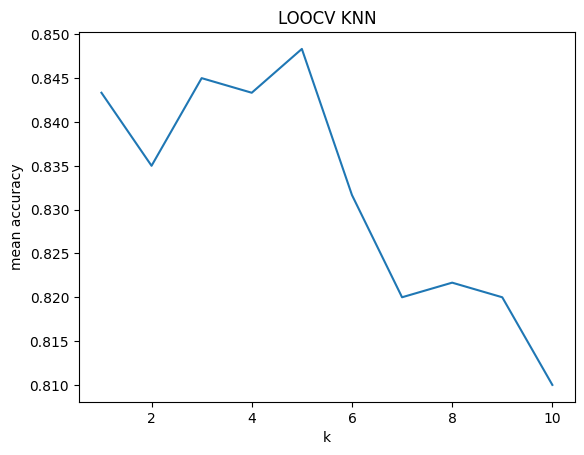

In [ ]:
import matplotlib.pyplot as plt
plt.plot(parameters, accuracies)
plt.title("LOOCV KNN")
plt.xlabel('k')
plt.ylabel('mean accuracy')